In [1]:
from TrafficLight import SimpleTrafficLight
import Model1
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

**Traffic lights**

In [2]:
controller_ew1 = SimpleTrafficLight()
controller_ew1.initialize(period=60, time_delay=0)

controller_ns1 = SimpleTrafficLight()
controller_ns1.initialize(period=60, time_delay=30)

controller_ew2 = SimpleTrafficLight()
controller_ew2.initialize(period=60, time_delay=10)

controller_ns2 = SimpleTrafficLight()
controller_ns2.initialize(period=60, time_delay=40)

**Intersection network**

The following intersection network consists of two four-way intersections in a 1x2 grid, each 15 m wide and 250 m apart. Each vehicle moves 14 m/s (50.4 km/h) at full speed.

In [3]:
intersection_system = Model1.IntersectionNetworkSimulator()
intersection_system.initialize(grid_dimensions=(1,2), grid_distance=250)
intersection_system.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=4, avg_arrival_time_n=15, avg_arrival_time_s=15, avg_arrival_time_e=15)
intersection_system.set_queue_rate_parameters(grid_ind=(0,1), avg_departure_time=4, avg_arrival_time_n=15, avg_arrival_time_s=15, avg_arrival_time_w=15)
intersection_system.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=controller_ns1, traffic_light_ew=controller_ew1)
intersection_system.set_traffic_lights(grid_ind=(0,1), traffic_light_ns=controller_ns2, traffic_light_ew=controller_ew2)

In [4]:
while intersection_system.time < 900: # 15 minutes
    intersection_system.run_event(delta_t=0.1)

Dictionary with simulation stats.

In [5]:
stats = intersection_system.get_stats()
print("Average wait time:", stats[(0,0)]["N"]["wait_time"], "s")

Average wait time: 10.9754929577465 s


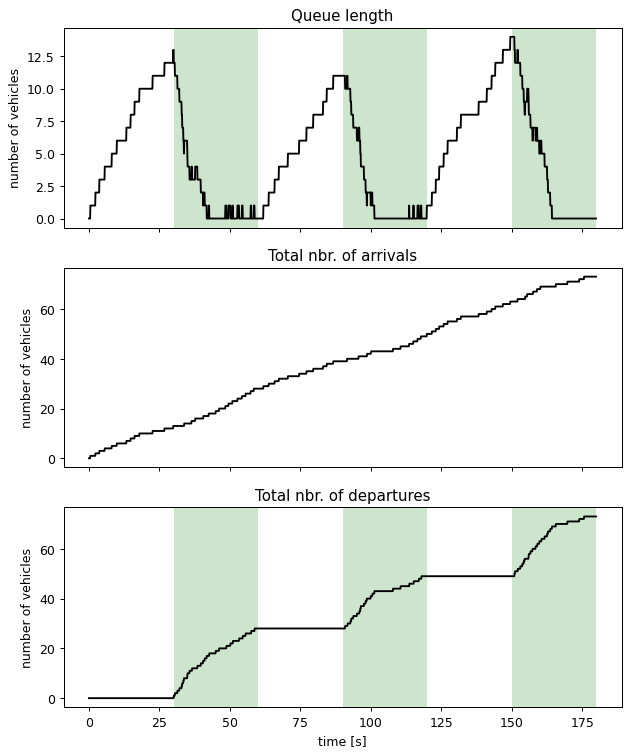

In [6]:
fig, axs = intersection_system.plot_queue_stats(plt=plt, grid_ind=(0,0), direction='N', end_time=180, delta_t=0.1, traffic_light=controller_ns1,fig_size=(8,10))
#plt.savefig('figs/northbound_(0,0)', bbox_inches='tight')